# Exploration of the Ford go-bike trips dataset
## by Eric Makuochukwu Udeh

## Investigation Overview

## Dataset Overview

The Ford GoBike services dataset is a valuable source of information that sheds light on the utilization of a bike-sharing system in numerous stations across the San Francisco region. It consists of individual records of rides made by users of the GoBike service, which can be analysed to reveal usage patterns. The dataset comprises details like the length of each ride in seconds, the origin and destination points of each trip, and the type of bike utilized. As a result, this dataset is a critical tool for anyone seeking to comprehend the workings of bike-sharing systems and their effects on urban transportation.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# loading the dataset into a pandas dataframe
go_bike = pd.read_csv('go_bike_clean.csv')
go_bike.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,age,dow
0,52185,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,35,thursday
1,61854,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,47,thursday
2,36490,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,30,thursday
3,1585,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,45,thursday
4,1793,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,60,thursday


In [10]:
# Creating a dictionary of fontsizes to be used throughout this slideshow.
fontdict = {'subtitles':20, 'titles':16, 'titles2':13, 'labels':13}

## Age distribution by Gender and User type
This shows the age distribution of the various genders of riders, as well as the two user types. It helps us see what age group(s) largely uses the GoBike service.


Note to Reviewer: 
When violin_plot() function is called in the subplots below, the final plots are not rendered on the same line. So I took this path instead. 

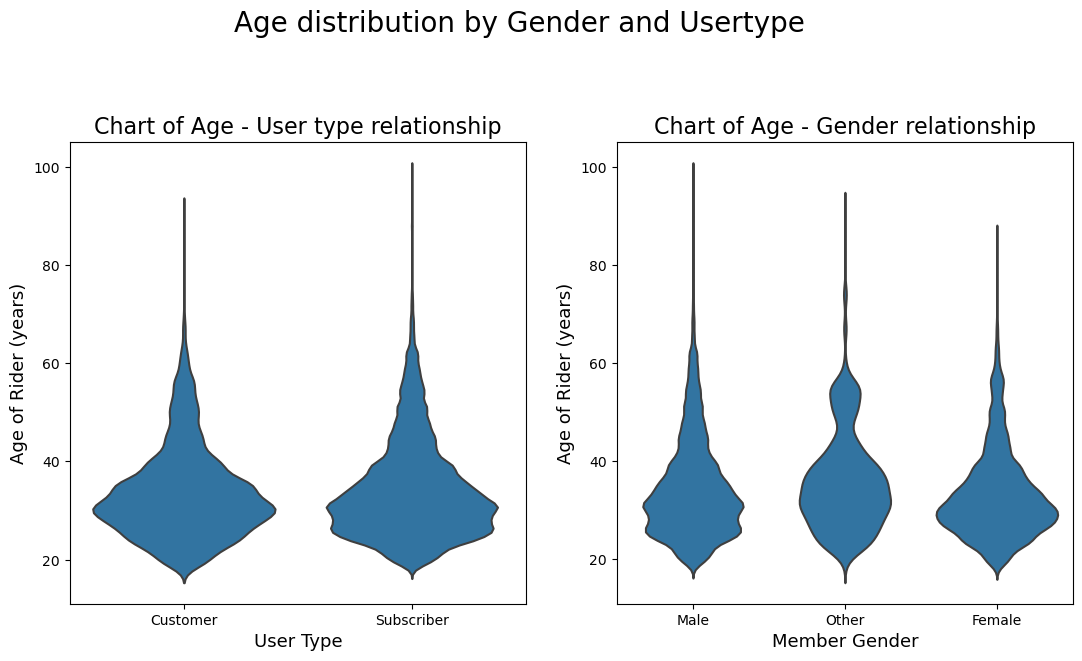

In [11]:
"""" Creating subpl ots to depict the Age distribution of Gender on one subplot, 
                and Age distribution of User types on the other"""

plt.figure(figsize = [20, 6])
base_color = sns.color_palette()[0]

# left plot: Age - User type relationship
plt.subplot(1, 3, 1)
sns.violinplot(data = go_bike, x = 'user_type', y = 'age', color = base_color, inner = None)
plt.title('Chart of Age - User type relationship', fontsize = fontdict['titles'])
plt.xlabel('User Type', fontsize = fontdict['labels'])
plt.ylabel('Age of Rider (years)', fontsize = fontdict['labels'])

# Right plot: Age - member gender relationship
plt.subplot(1, 3, 2)
sns.violinplot(data = go_bike, x = 'member_gender', y = 'age', color = base_color, inner = None)
plt.title('Chart of Age - Gender relationship', fontsize = fontdict['titles'])
plt.xlabel('Member Gender', fontsize = fontdict['labels'])
plt.ylabel('Age of Rider (years)', fontsize = fontdict['labels'])


plt.suptitle('Age distribution by Gender and Usertype',
             fontsize = fontdict['subtitles'], x = 0.35, y = 1.1);

It is now very clear that the service of Ford GoBike is usually needed by young people between the ages of 20 and 40 years of age.

## Ride duration and Age: Analysing gender differences in trip length

This chart sheds more light on the question of wether one gender tends to take longer or shorter rides than the other. The question originated when it was found that the cumulative duration of rides by male riders was far greater than that of female riders and riders of other genders.

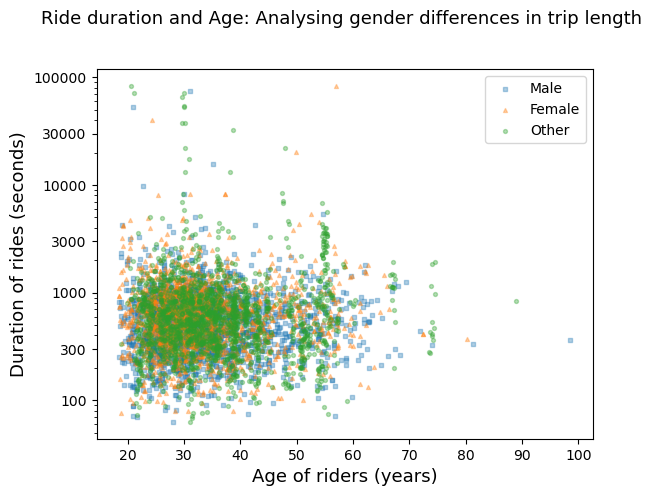

In [12]:
# Plotting a scatter plot of ride duration against age, with markers indicating gender groups 
yticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
ylabel = ['{}'.format(v) for v in yticks]

gender_marker = [['Male','s'],
                ['Female','^'],
                ['Other','o']]
for gender, marker in gender_marker:
    plot_data = go_bike[go_bike.member_gender == gender].sample(1740)
    sns.regplot(data = plot_data, x = 'age', y = 'duration_sec', x_jitter = 0.5, fit_reg = False, 
               marker = marker, scatter_kws = {'s': 8, 'alpha':0.35})
    plt.yscale('log')
    plt.legend(['Male','Female','Other'])

plt.title('Ride duration and Age: Analysing gender differences in trip length ',
          fontsize = fontdict['titles2'], y = 1.1)
plt.xlabel('Age of riders (years)', fontsize = fontdict['labels'])
plt.ylabel('Duration of rides (seconds)', fontsize = fontdict['labels'])
plt.yticks(yticks, ylabel)
plt.show()

The chart above shows that while there are a lot more male riders than any other gender, the gender of riders generally does not impact on the duration of rides. And that the cumulative duration of rides by male riders is only because of the number of male riders in the dataset. 

## Ride duration and Age: Analysing user types differences in trip length
This chart seeks to answer the question of wether a particular user type tend to have longer or shorter rides on the average.

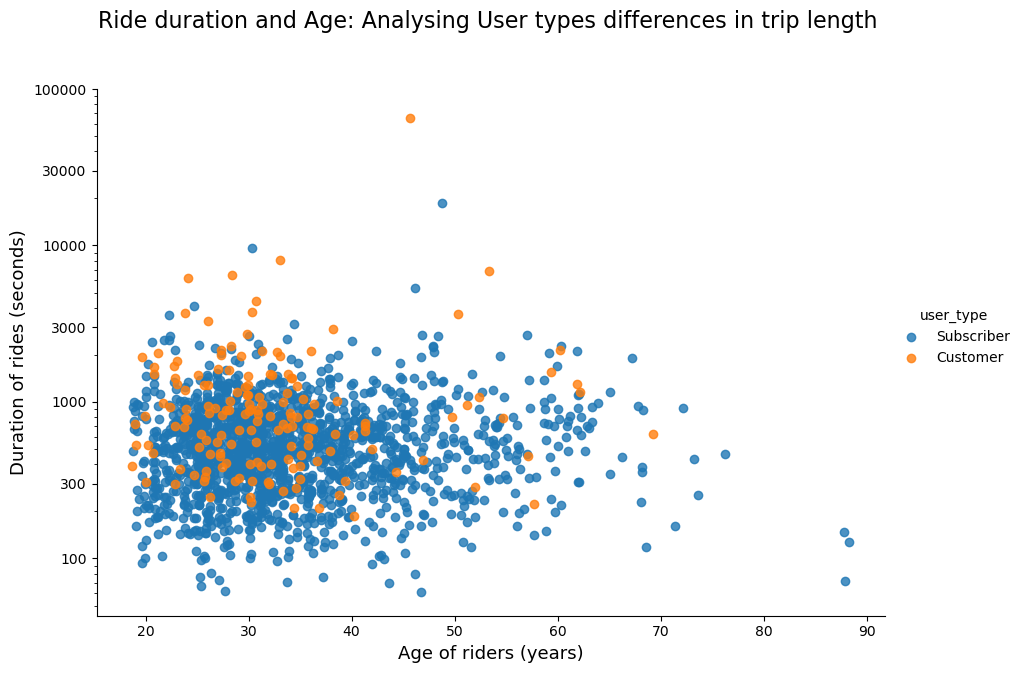

In [13]:
# Plotting a regplot of duration against age, with a hue of user types

yticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
ylabel = ['{}'.format(v) for v in yticks]

g = sns.FacetGrid(data = go_bike.sample(1744), hue = 'user_type', size = 6, aspect = 1.5)
g = g.map(sns.regplot, 'age', 'duration_sec', x_jitter = 0.4, fit_reg = False);
g.add_legend()
plt.yscale('log')
plt.yticks(yticks, ylabel)
plt.title('Ride duration and Age: Analysing User types differences in trip length ',
          fontsize = fontdict['titles'], y = 1.1)
plt.xlabel('Age of riders (years)', fontsize = fontdict['labels'])
plt.ylabel('Duration of rides (seconds)', fontsize = fontdict['labels'])
plt.show()

While the plot doesn't clearly indicate wether a particular user type spend more time on rides than the other, we can clearly see that a lot more subscribers spend less than 300 seconds on a ride. 

Another indication is the fact that the older age groups, 50 years and above, are mainly composed of Subscribers

In [14]:
!jupyter nbconvert Ford_GoBike_slideshow.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_slideshow.ipynb to slides
[NbConvertApp] Writing 656022 bytes to Ford_GoBike_slideshow.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\HP\anaconda3\li